# Arvore de Decisão - Beneficio.csv
#### Para alterar o valor que se deseja prever, altere o valor da variável yColumn

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#Nome do arquivo
fileName = "Beneficio.csv"

#Diretorio raiz
rootPath = "C:\\Users\\rogerio.silva\\Documents\\ufrj\\IA-2020\\Arquivos"

#Caminho completo do arquivo
filePath = f'{rootPath}\\{fileName}'

In [3]:
#Nomes das colunas
CITY = 'Cidade'
AGE = 'Idade'
INCOME = 'Renda'
GENDER = 'Sexo'
BENEFIT = 'Beneficio'

#Define coluna do eixo y
yColumn = BENEFIT

#Le arquivo csv
data = pd.read_csv(filePath)

In [4]:
def mapCol2Numbers(data, colName):
    
    #Obtem coluna especificada
    colData = data[colName]
    
    #Filtra dados não repetidos e ordena lista
    colValues = list(dict.fromkeys(colData))
    colValues.sort()
    
    cityIndex = dict()
    
    #Faz o map de strings para numeros
    for index in range(len(colValues)):
        name = colValues[index]
        cityIndex[name] = index
        
        
    return cityIndex

def replaceNonNumericValues(data,colName):
    nameId = mapCol2Numbers(data,colName)
    
    #Itera sobre os nomes encontrados e substitui pelo valor associado
    #de acordo com o definido em nameId
    for name in list(nameId.keys()):
        data.loc[data[colName] == name, colName] = nameId[name]

In [5]:
#Contem o id associado a cada coluna de dados nao-numericos
CITY_ID = mapCol2Numbers(data, CITY)
GENDER_ID = mapCol2Numbers(data, GENDER)
BENEFIT_ID = mapCol2Numbers(data, BENEFIT)

replaceNonNumericValues(data, CITY)
replaceNonNumericValues(data, GENDER)
replaceNonNumericValues(data, BENEFIT)

In [6]:
CITY_ID,GENDER_ID,BENEFIT_ID

({'Marica': 0, 'Pelotas': 1, 'Piripiri': 2},
 {'feminino': 0, 'masculino': 1},
 {'Não': 0, 'Sim': 1})

In [7]:
#Separa eixo x e eixo y
x = data.drop(yColumn, axis=1)
y = data[[yColumn]]

#Converte dados para array de int
xArray = x.to_numpy(int)
yArray = y.to_numpy(int)

#Separa dados de treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(xArray, yArray, test_size=0.2, random_state=0) 

#Treina o classificador
classifier = tree.DecisionTreeClassifier()
classifier.fit(xTrain, yTrain)

#Faz predicao e plota matriz de confusao
yPred = classifier.predict(xTest)
confusion_matrix(yTest.transpose()[0],yPred) 

array([[ 6,  2],
       [ 0, 16]], dtype=int64)

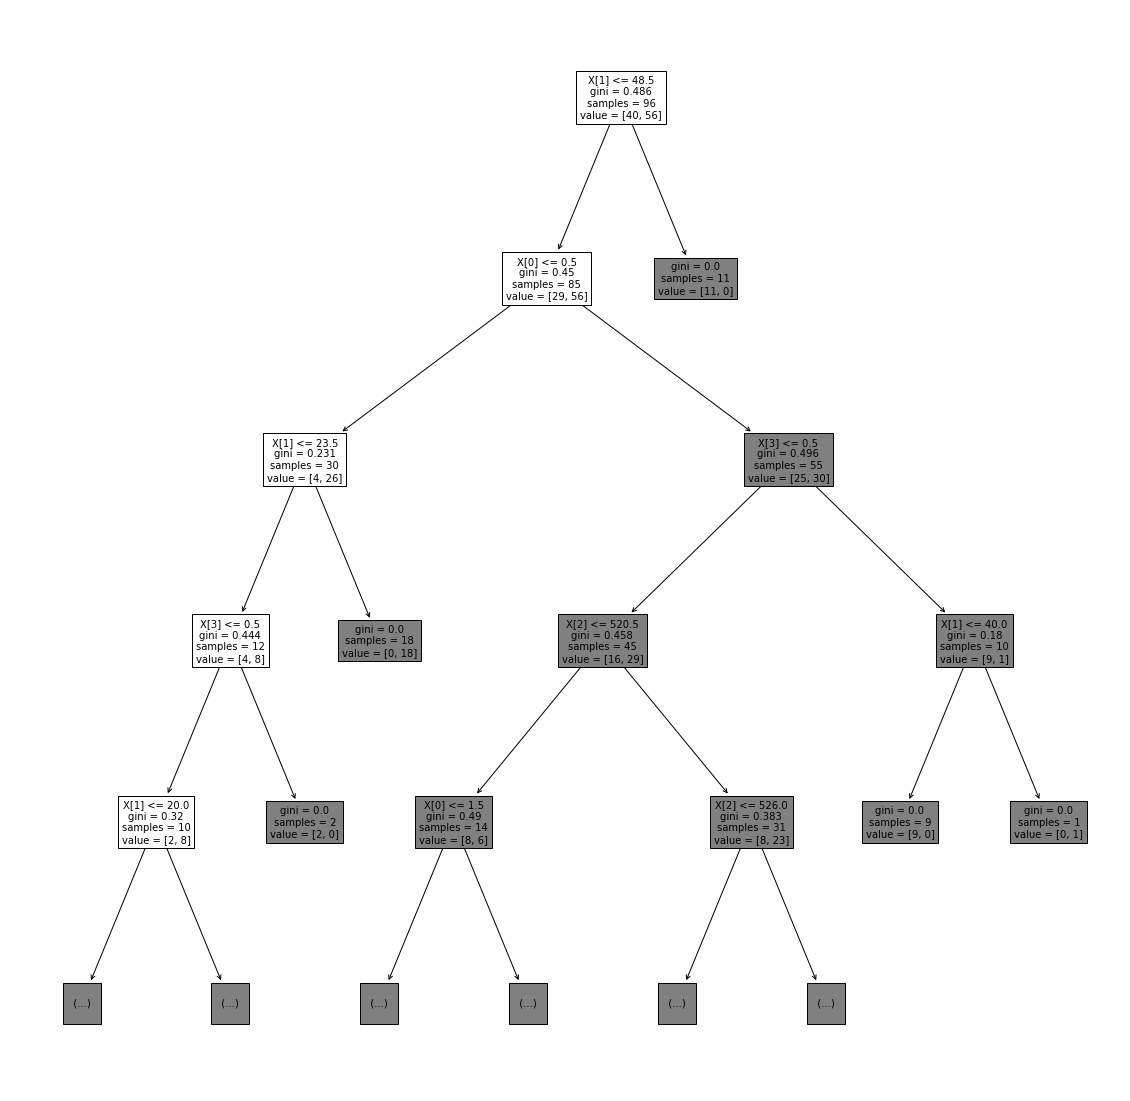

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(classifier, max_depth=4, fontsize=10)
plt.show()
#tree.plot_tree(classifier)
#x,xTest

In [9]:
data

,Cidade,Idade,Renda,Sexo,Beneficio
0,0,25,522,1,1
1,0,22,521,1,0
2,0,22,520,1,0
3,0,23,525,1,0
4,0,30,525,1,1
...,...,...,...,...,...
115,2,22,525,0,1
116,2,52,520,1,0
117,2,23,520,1,0
118,2,25,521,0,1
